<a href="https://colab.research.google.com/github/ambreenraheem/Deep-Learning/blob/main/transfer_learning_feature_extraction(data_augmentation)_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ambreen Abdul Raheem (Upwork Freelancer)
### Sir Sajjid Majeed (NED Academy)
### PGD Program: Data Science with Artificial Intelligence
### Module: Deep Learning
##### Topic: Transfer Learning Feature Extration with Data Augmentatiom on the same Dog vs. Cat dataset."

### Transfer Learning Feature Extraction (Data Augmentation)

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 95% 1.01G/1.06G [00:07<00:00, 140MB/s]
100% 1.06G/1.06G [00:07<00:00, 146MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [5]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [7]:
conv_base.trainable = False

In [11]:
# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img # Original import
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img # Use the TensorFlow path

In [12]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 172s 256ms/step - accuracy: 0.8281 - loss: 0.4394 - val_accuracy: 0.8976 - val_loss: 0.2446
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 246ms/step - accuracy: 0.8981 - loss: 0.2383 - val_accuracy: 0.9072 - val_loss: 0.2147
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 246ms/step - accuracy: 0.9095 - loss: 0.2186 - val_accuracy: 0.9028 - val_loss: 0.2246
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 155s 248ms/step - accuracy: 0.9094 - loss: 0.2109 - val_accuracy: 0.9176 - val_loss: 0.1964
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 253ms/step - accuracy: 0.9133 - loss: 0.2022 - val_accuracy: 0.9206 - val_loss: 0.1923
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 247ms/step - accuracy: 0.9174 - loss: 0.1930 - val_accuracy: 0.9168 - val_loss: 0.1885
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 246ms/step - accuracy: 0.9242 - loss: 0.1856 - val_accuracy: 0.9202 - val_loss: 0.1905
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 246ms/step - accuracy: 0.9229 -

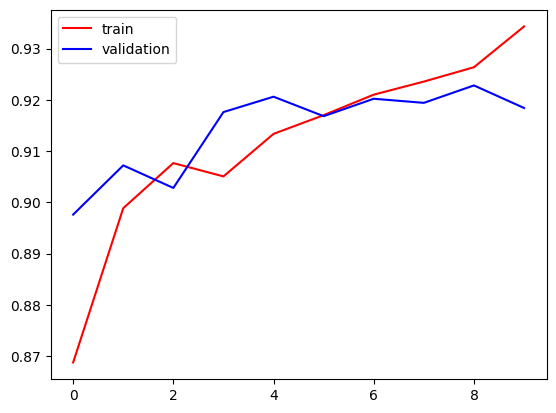

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

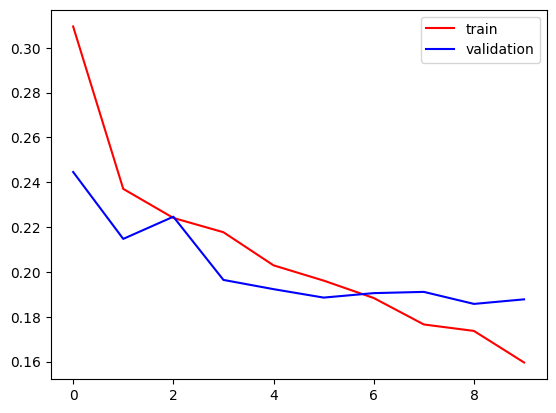

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [18]:
import cv2

In [19]:
test_img= cv2.imread('/content/cat.jpg')

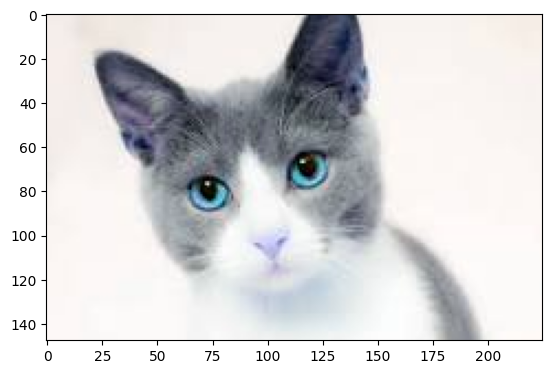

In [20]:
plt.imshow(test_img)

In [25]:
test_img.shape

(148, 225, 3)

In [26]:
test_img= cv2.resize(test_img,(150,150))

In [30]:
test_input= test_img.reshape((1,150,150,3))

In [31]:
# Make the prediction
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[0.]], dtype=float32)

In [21]:
test_img2= cv2.imread('/content/dog.jpg')

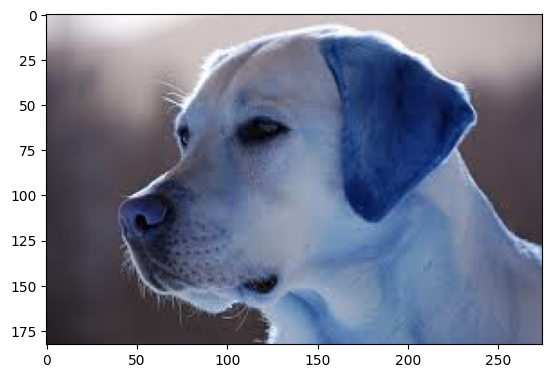

In [22]:
plt.imshow(test_img2)

In [32]:
test_img2.shape

(183, 275, 3)

In [33]:
test_img2= cv2.resize(test_img2,(150,150))

In [34]:
test_input2= test_img2.reshape((1,150,150,3))

In [35]:
model.predict(test_input2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[1.]], dtype=float32)

In [23]:
test_img3= cv2.imread('/content/dog cat.jpg')

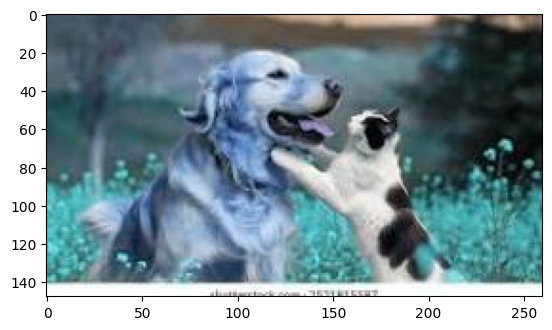

In [24]:
plt.imshow(test_img3)

In [36]:
test_img3.shape

(148, 260, 3)

In [37]:
test_img3= cv2.resize(test_img3,(150,150))

In [38]:
test_input3= test_img3.reshape((1,150,150,3))

In [39]:
model.predict(test_input3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[1.]], dtype=float32)